# Part 2 - Unsupervised

In [77]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [78]:
df = pd.read_csv("data/Unsupervised/Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Columns
- country: Name of the country  
- child_mort: Death of children under 5 years of age per 1000 live births  
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita  
- health: Total health spending per capita. Given as %age of GDP per capita  
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita  
- Income: Net income per person  
- Inflation: The measurement of the annual growth rate of the Total GDP  
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same  
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.  
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.  


# Data analysis and visualization

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [80]:
len(df[df.duplicated()])

0

We can see that we don't have any missing values and duplicates. The dataset is not very large with only 167 entries.

In [81]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


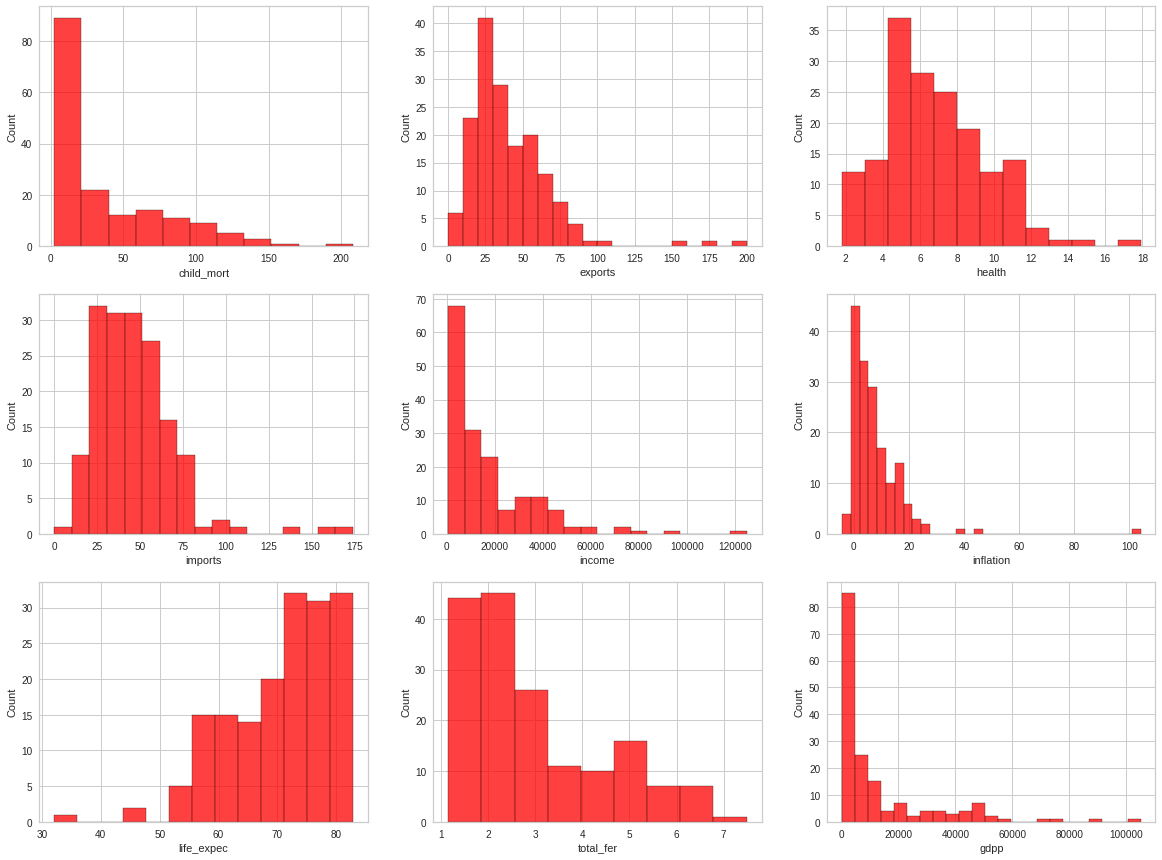

In [82]:
figure, axs = plt.subplots(3,3, figsize=(20, 15))
for i in range(0, 3):
    for j in range(0, 3):
        sns.histplot(x=df[df.columns[1 + i * 3 + j]], ax=axs[i,j],color='red')

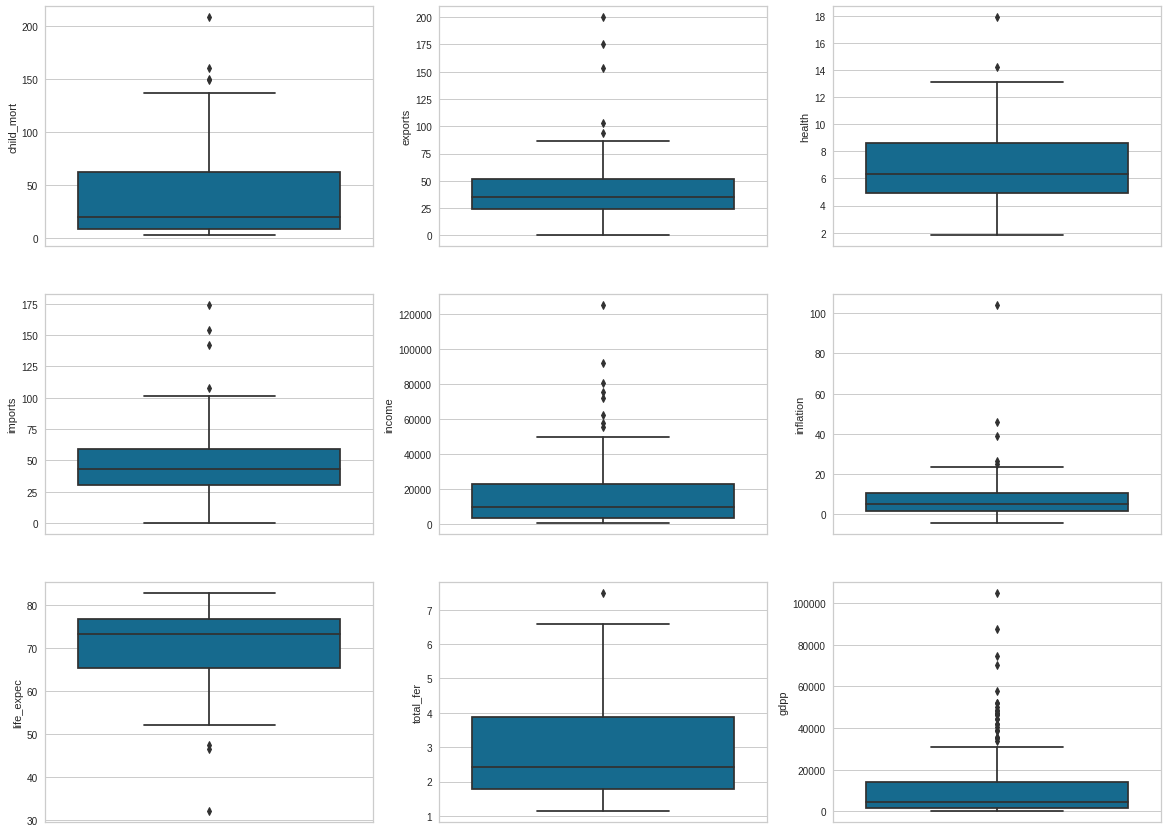

In [83]:
figure, axs = plt.subplots(3,3, figsize=(20, 15))
for i in range(0, 3):
    for j in range(0, 3):
        sns.boxplot(y=df[df.columns[1 +  i * 3 + j]], ax=axs[i,j])

These graphs gives us the repartition of the different features of our dataset. We can see that there are a few outliers.

# Data evaluation and correlation

<AxesSubplot:>

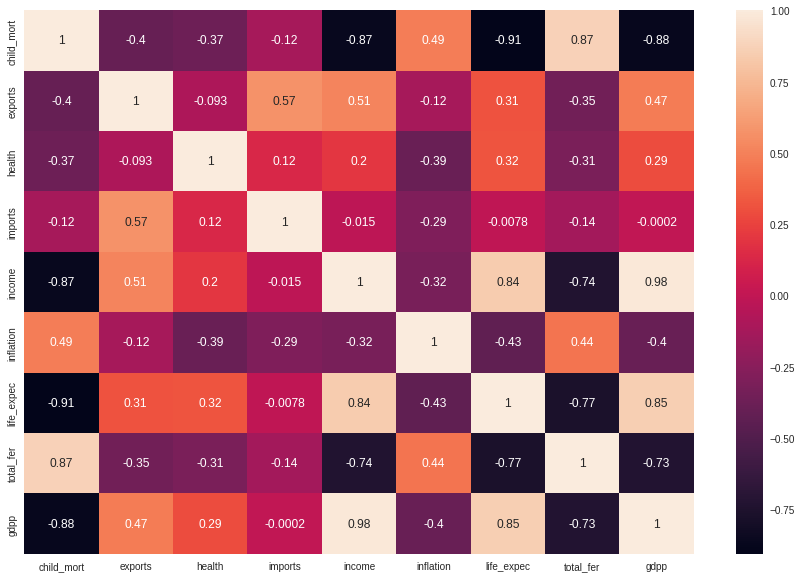

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman', min_periods=1),annot=True, cmap='rocket')

We can see that some features are highly correlated (with a rate of 87%) and we might need to remove them:  
- life_expect with child mortality  
- total_fertility with child mortality  
- income with gdpp  
- child_mort with income and gdpp

In [85]:
df_train = df.drop(['country'], axis=1)
df_train

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

We are using MinMax to scale our data

In [87]:

columns = df_train.columns

scaler = MinMaxScaler()

rescaled_dataset_minmax = scaler.fit_transform(df_train)
rescaled_dataset_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [88]:
df_minmax = pd.DataFrame(data= rescaled_dataset_minmax , columns = columns )
df_minmax

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


Text(0, 0.5, 'Child Mortality')

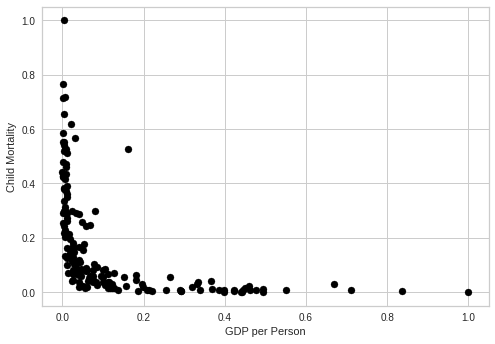

In [89]:
plt.scatter(df_minmax['gdpp'], df_minmax['child_mort'],color = 'black')
plt.scatter

plt.xlabel('GDP per Person')
plt.ylabel('Child Mortality')

We are now doing the PCA to reduce the problem's dimensionality

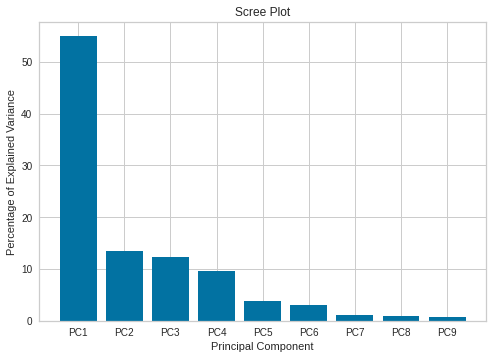

Text(0, 0.5, 'PC2 - 13.4%')

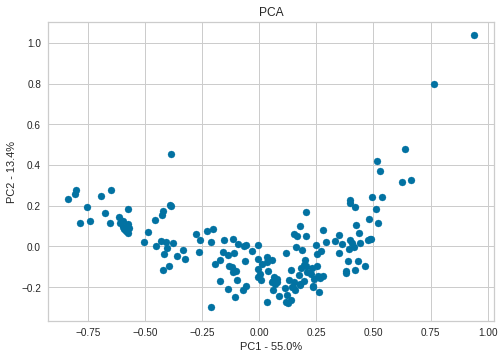

In [90]:
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_minmax)
pca_data_minmax = pca.transform(df_minmax)


per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]


plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)
plt.scatter(pca_df_minmax.PC1, pca_df_minmax.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

After doing PCA, we can see that there are 4 principal components can explain about 90% of the distribution of the original data. So the others one can be drop

In [91]:
data_pca = pca_df_minmax.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
data_pca

,PC1,PC2,PC3,PC4
0,-0.599078,0.095490,0.157554,-0.024333
1,0.158474,-0.212092,-0.064189,-0.061247
2,0.003686,-0.135867,-0.134182,0.133574
3,-0.650235,0.275975,-0.142672,0.156018
4,0.200711,-0.064662,-0.100715,-0.037902
...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099
163,0.061133,-0.171339,-0.058586,0.247460
164,0.115512,-0.032034,-0.195243,-0.231993
165,-0.332968,-0.019824,-0.029989,0.105416


In [92]:
# Model: KMeans

In [93]:
from sklearn.cluster import KMeans

km = KMeans (n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-4, random_state = 0)

In [94]:
y_predicted_minmax = km.fit_predict(df_minmax)
y_predicted_minmax

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [95]:
y_predicted_data_pca = km.fit_predict(data_pca)
y_predicted_data_pca

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

We are adding to cluster columns, one with minmax and one with data_pca

In [96]:
df_minmax['cluster'] = y_predicted_minmax
df_minmax.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


In [97]:
df_train['cluster'] = y_predicted_data_pca
df_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Elbow method

we are using it to optimize the clustering

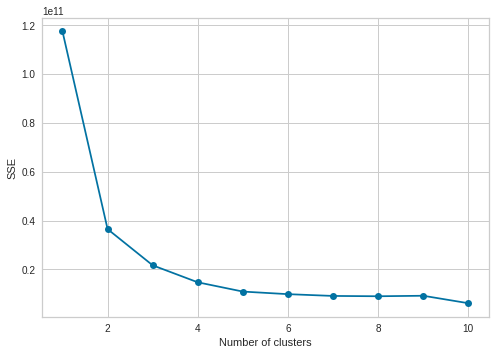

In [98]:
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_train)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

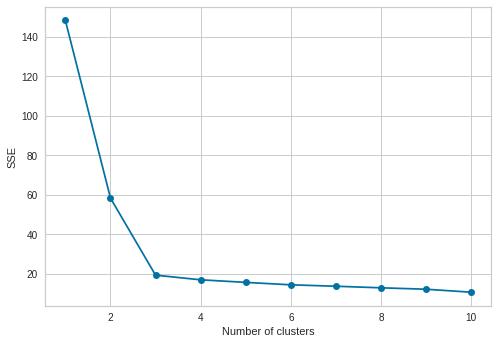

In [99]:
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_minmax)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

After running the K-Means model with a normalised dataset, and a PCA with 4 components (with standardised scaling) we can see that the optimal number of clusters is still 3 with different levels of inertia. Two clusters could also be considered as per results of dataset after PCA.

## Silhouette Method

In [100]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [101]:
score = silhouette_score(df_minmax, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.247


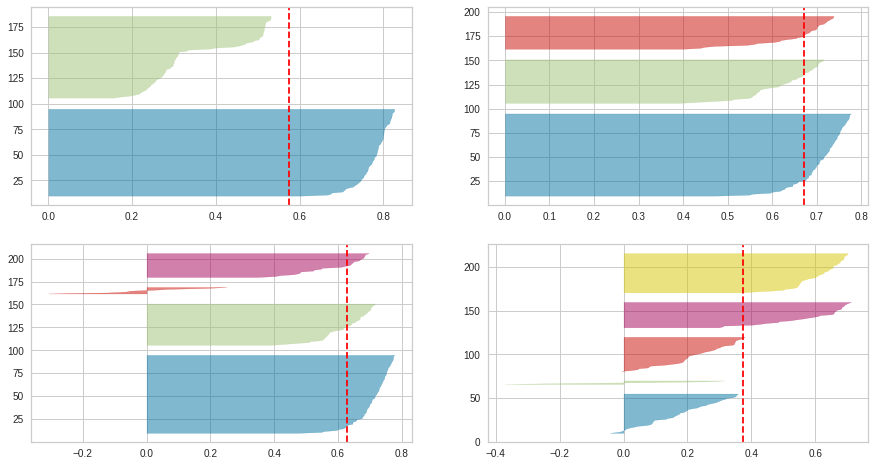

In [102]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)

    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_minmax)


In [103]:
score = silhouette_score(df_minmax, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.374


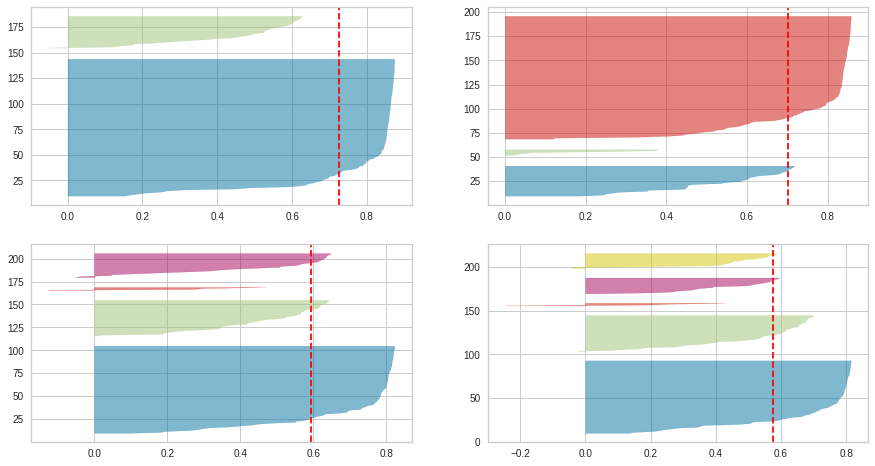

In [104]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)

    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_train)


Silhouette Scores are very close to 0 indicating that clusters are overlapping. An increase in clusters (to 5 for example) shows that there are negative values in the scale, meaning that this n of clusters might have samples that have been assigned to the wrong cluster.

# Cluster analysis

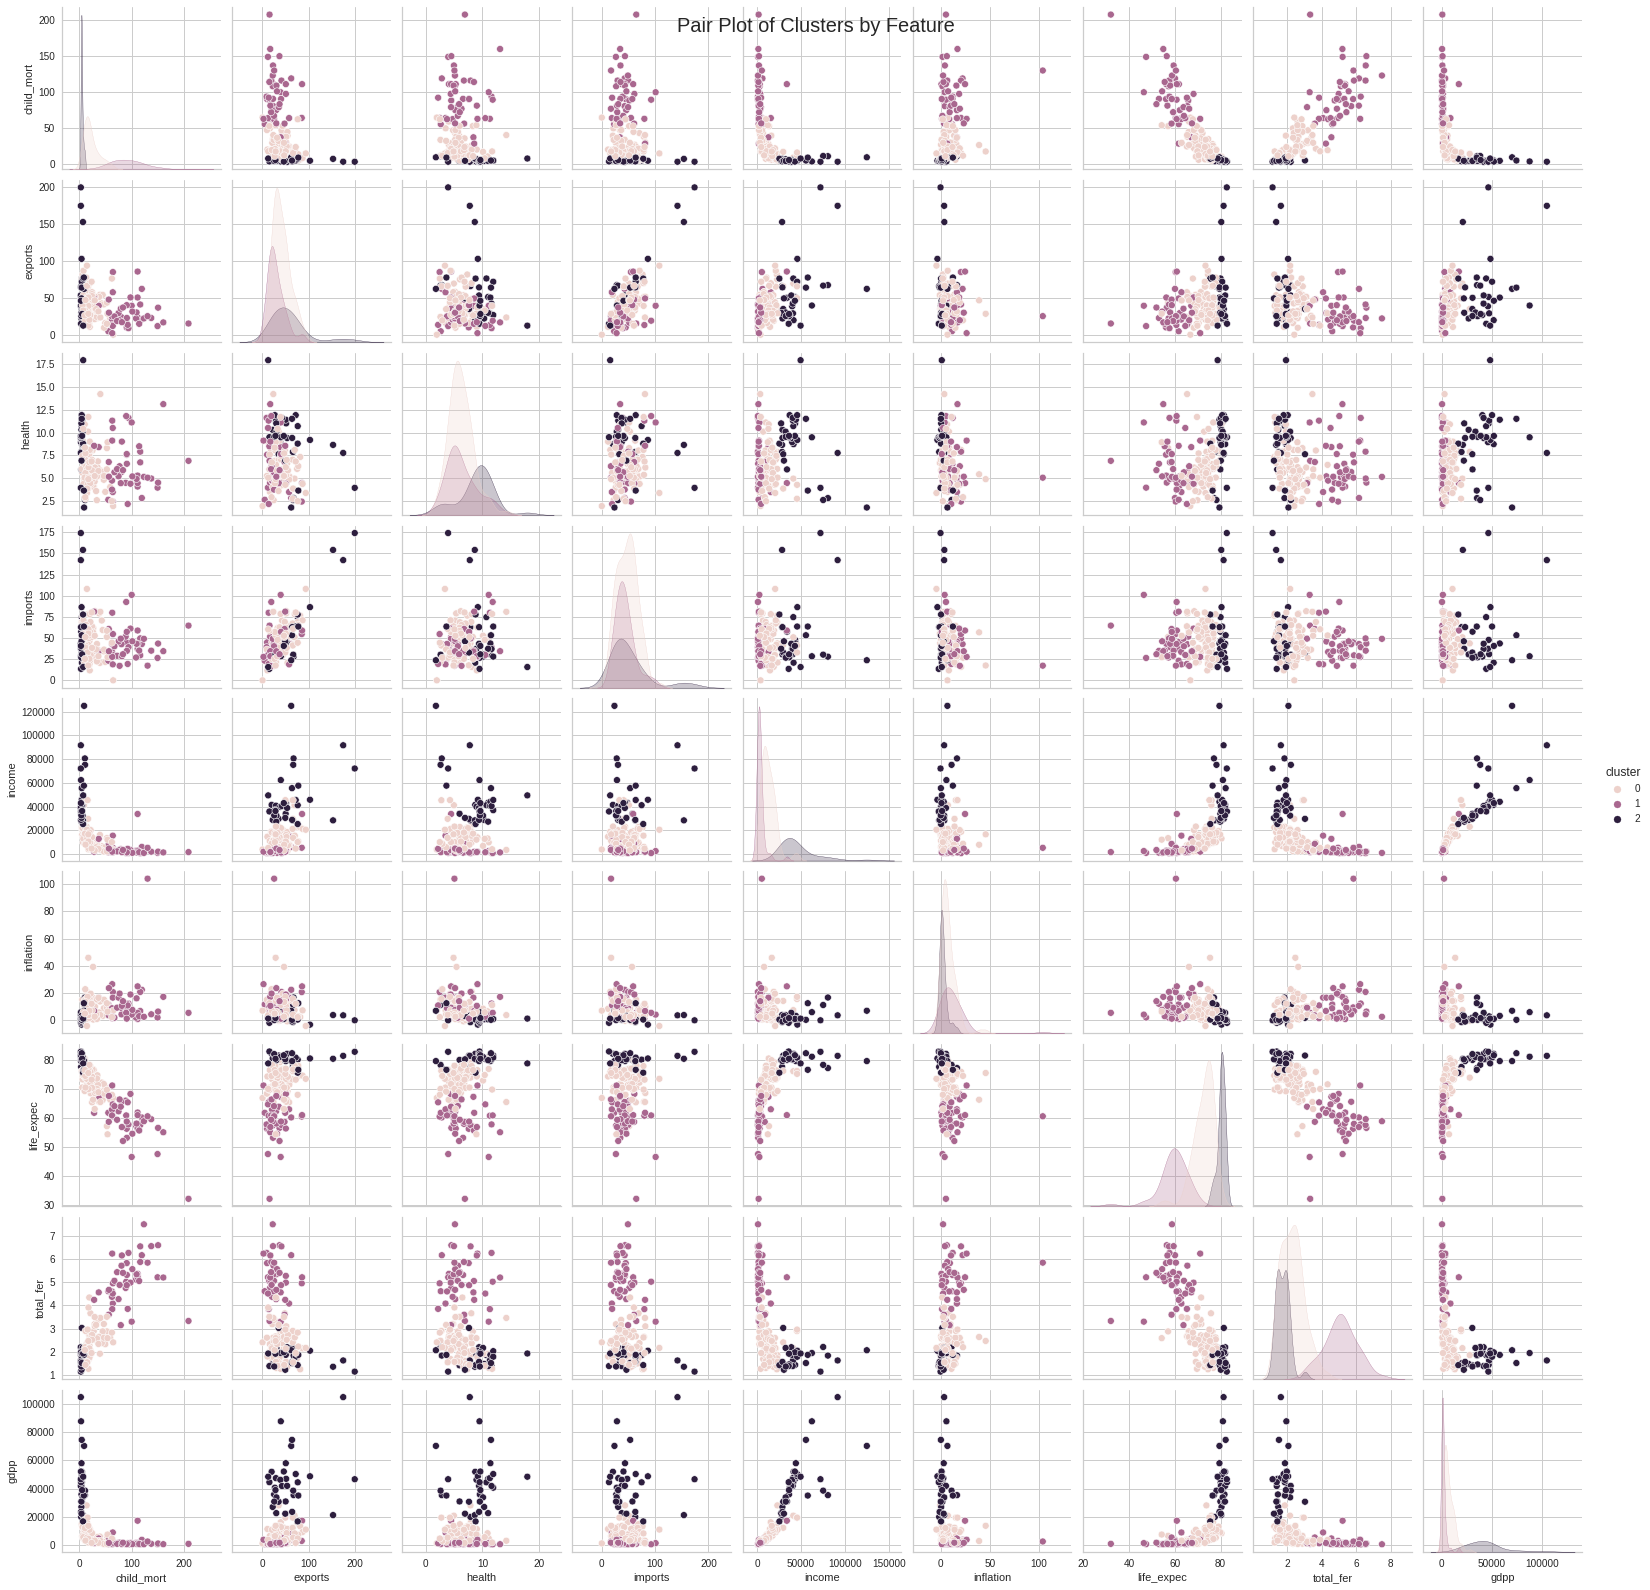

In [105]:
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(df_train, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature',
             size = 20);

After running the model, we can see they tend to be overlapping between clusters. Cluster 2 is more spread out and clusters 0 and 1 tend to overlap.

## Cluster descriptions

In [106]:
df['cluster'] = y_predicted_minmax.tolist()
df

clusters_table = pd.pivot_table(df, index=['cluster'])
clusters_table

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
0,22.425581,40.382430,6719.790698,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256
1,93.284783,29.287174,1695.913043,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217
2,4.897143,58.431429,43117.142857,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143


In [107]:
cluster_0 = df.loc[df['cluster'] == 0]

cluster_0.country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania',
       'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'South Africa', 'Sri Lanka', 'St. Vincent

Cluster 0: This cluster is characterised by showing average values for all features when comparing with other clusters

- child mortality, avg
- exports, avg
- gdpp, avg
- health, same as cluster 1
- imports, avg
- income, avg
- inflation, avg
- life_expect, +70 years
- total_fer, avg, 2 children per woman (number of children that would be born to each woman if the current age-fertility rates remain the same)

We obtain similar result with the two others clusters.

# Clusters and their localisation in the world

In [108]:
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px

In [109]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [110]:
list_difference = []
for item in sorted(world['name'].unique()):
  if item not in sorted(df['country'].unique()):
    list_difference.append(item)

print(list_difference)

['Antarctica', 'Bosnia and Herz.', 'Central African Rep.', 'Congo', 'Cuba', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Djibouti', 'Dominican Rep.', 'Eq. Guinea', 'Ethiopia', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Greenland', 'Honduras', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Mexico', 'N. Cyprus', 'New Caledonia', 'Nicaragua', 'North Korea', 'North Macedonia', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'Somalia', 'Somaliland', 'Syria', 'Taiwan', 'Trinidad and Tobago', 'United States of America', 'W. Sahara', 'Zimbabwe', 'eSwatini']


In [111]:
world['name'] = world['name'].replace(
    ['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Macedonia', 'Myanmar', 'N. Cyprus', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'United States of America'],
    ['Bosnia and Herzegovina','Central African Republic','Congo, Rep.',"Cote d'Ivoire",'Congo, Dem. Rep.','Dominican Republic','Equatorial Guinea','Macedonia, FYR','Myanmar','Cyprus','Sudan','Slovak Republic','Solomon Islands','United States'])

In [112]:
world_copy = world.copy()
world_copy.rename(columns = {'name' : 'country'}, inplace = True)
world_copy.head()

# append geodataframe data with data_combined data
world_data = pd.merge(
        df,
        world_copy,
        on='country',
        how= 'inner'
)

world_copy

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [115]:
import geoplot
import mapclassify

/home/bictole/.local/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

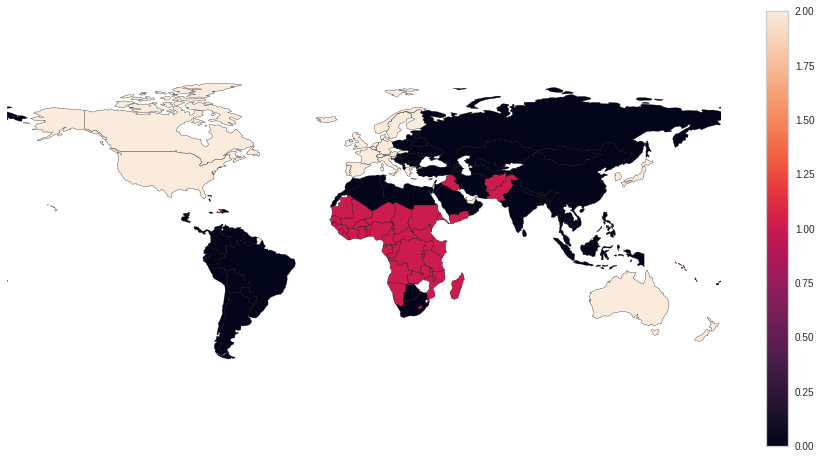

In [128]:
world_data = gdf(world_data)

cluster = world_data['cluster']

geoplot.choropleth(
    world_data,
    hue=cluster,
    cmap='rocket',
    figsize=(16, 8),
    legend = True
)

- Countries in Cluster 2 (characterised by showing really strong or positive values such as good economic development, high life expectancy, low child mortality) are located in North America, Europe, Oceania and a couple in Asia.
- Countries in Cluster 1 (characterised by having the most negative values: high child mortality, lowest economic development) are located across Africa and Asia.
- Countries in Cluster 0 (characterised by showing average values for all features when comparing with other clusters) are located across South America, parts of Africa, Europe and Asia.
- Blank spaces (like Mexico) are of countries with no available data.

## Result Analysis

First we drop the column that have a too high correlation.

In [129]:
dataset_reduced = df.drop(['country','life_expec','total_fer','income'], axis =1)
dataset_reduced.head()

,child_mort,exports,health,imports,inflation,gdpp,cluster
0,90.2,10.0,7.58,44.9,9.44,553,1
1,16.6,28.0,6.55,48.6,4.49,4090,0
2,27.3,38.4,4.17,31.4,16.10,4460,0
3,119.0,62.3,2.85,42.9,22.40,3530,1
4,10.3,45.5,6.03,58.9,1.44,12200,0


Then we need to rescale these data that are not scaled for the moment.

In [131]:
columns = dataset_reduced.columns

scaler = StandardScaler()

rescaled_dataset_reduced = scaler.fit_transform(dataset_reduced)
rescaled_dataset_reduced

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  0.15733622,
        -0.67917961,  0.38436145],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.31234747,
        -0.48562324, -0.87423389],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.78927429,
        -0.46537561, -0.87423389],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.40973191,
        -0.63775406, -0.87423389],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.50091625,
        -0.63775406,  0.38436145],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  0.59001454,
        -0.62954556,  0.38436145]])

In [132]:
df_reduced = pd.DataFrame(data= rescaled_dataset_reduced , columns = columns)
df_reduced

,child_mort,exports,health,imports,inflation,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,0.157336,-0.679180,0.384361
1,-0.538949,-0.479658,-0.097016,0.070837,-0.312347,-0.485623,-0.874234
2,-0.272833,-0.099122,-0.966073,-0.641762,0.789274,-0.465376,-0.874234
3,2.007808,0.775381,-1.448071,-0.165315,1.387054,-0.516268,0.384361
4,-0.695634,0.160668,-0.286894,0.497568,-0.601749,-0.041817,-0.874234
...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.489784,-0.546913,-0.874234
163,-0.526514,-0.461363,-0.695862,-1.213499,3.616865,0.029323,-0.874234
164,-0.372315,1.130305,0.008877,1.380030,0.409732,-0.637754,-0.874234
165,0.448417,-0.406478,-0.597272,-0.517472,1.500916,-0.637754,0.384361


In [133]:
y_predicted_reduced = km.fit_predict(df_reduced) 
y_predicted_reduced

array([4, 1, 1, 4, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1,
       1, 0, 1, 4, 4, 1, 4, 0, 1, 4, 4, 1, 1, 1, 4, 4, 4, 1, 4, 1, 0, 0,
       0, 1, 1, 1, 1, 4, 4, 1, 1, 0, 0, 4, 4, 1, 0, 4, 0, 1, 1, 4, 4, 1,
       4, 1, 0, 1, 1, 1, 4, 0, 0, 0, 1, 0, 1, 1, 4, 4, 0, 1, 4, 1, 1, 4,
       4, 1, 1, 2, 1, 4, 4, 1, 1, 4, 2, 4, 1, 1, 1, 3, 1, 1, 4, 4, 4, 1,
       0, 0, 4, 3, 0, 1, 4, 1, 1, 1, 1, 1, 0, 0, 1, 1, 4, 1, 1, 4, 1, 1,
       4, 2, 0, 0, 1, 1, 0, 0, 1, 1, 4, 1, 0, 0, 1, 4, 1, 4, 4, 1, 1, 1,
       1, 4, 1, 0, 0, 0, 1, 1, 1, 3, 1, 4, 4], dtype=int32)

In [134]:
df_reduced['cluster'] = y_predicted_reduced
df_reduced.head()

,child_mort,exports,health,imports,inflation,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,0.157336,-0.679180,4
1,-0.538949,-0.479658,-0.097016,0.070837,-0.312347,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,0.789274,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,1.387054,-0.516268,4
4,-0.695634,0.160668,-0.286894,0.497568,-0.601749,-0.041817,1


He we compute the Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA

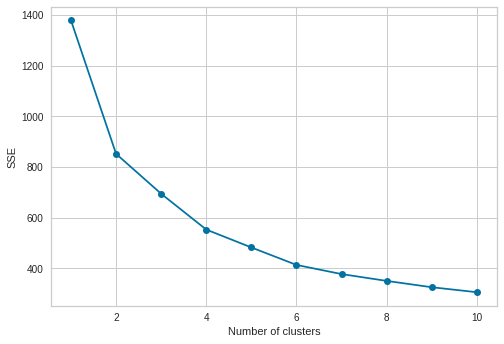

In [135]:
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_reduced)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### Findings

Dropping the features identified as having high correlation earlier in this notebook has resulted in 2 clusters with high inertia. There are no significant changes compared to what we have found in previous steps.

FIN